# Chapter 11. An Application: Approximation and Optimisation

*(C) Copyright Notice: This chapter is part of the book available at https://pp4e-book.github.io/ and copying, distributing, modifying it requires explicit permission from the authors. See the book page for details: https://pp4e-book.github.io/*

In this chapter, as an application for programming with Python, we will cover some mathematical methods widely used in many disciplines. We will start with Taylor Series for approximating a function. We will then see Newton's method for finding the roots of a function $f(x)$, which can also be considered as an application of Taylor series. Finally, we will cover how we can extend Newton's method for finding the minimum of a function.

## 11.1. Approximating Functions with Taylor Series

In some engineering or scientific problems, we have limited access to a function: We might be provided only the value of the function or its derivatives at certain input values and we might be required to make estimations (approximations) about the values of the function at other input values. Taylor's series is one method that provides us a very elegant solution for approximating a function.

The Taylor series of a function $f(\cdot)$ is essentially an infinite sum of terms that converges to the value of the function at $x$, i.e. $f(x)$. In more formal terms: 

$$
f(x) = f(a) + \frac{f'(a)}{1!}(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 ...
$$

which can be re-written in a more compact form:

$$
f(x) = \sum_{n=0}^\infty \frac{f^{(n)}(a)}{n!}(x-a)^n .
$$

In the limit ($n\rightarrow\infty$), $f(x)$ will be equal to its Taylor series. However, in realistic applications, it is impractical to take $n\rightarrow\infty$. In practice, we take the first $m$ terms of the series and approximate the function with this:

$$
f(x) \approx f(a) + \frac{f'(a)}{1!}(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 ... + \frac{f^{(m)}(a)}{m!}(x-a)^m,
$$

ignoring the terms for $n > m$. 

Note that the denominator ($n!$) gets large values quickly when $n$ gets large. Therefore, higher-order terms in the Taylor series are likely to be very small values. For this reason, taking the first $m$ terms in the series do provide sufficient approximations to $f(x)$ in practice.

We can provide some intuition for the Taylor Series as follows: If we know the value of function $f$ at $x=a$, then we can calculate the value of the function at any other value of $x$ as long as we know all (or the first $m$) derivatives of the function at $x=a$, i.e. $f^{(n)}(a)$ for $n=1, ..., \infty$ (or $m$). To see this, consider just the Taylor Series approximation with the first two terms: $f(x) \approx  f(a) + \frac{f'(a)}{1!}(x-a)$, which is illustrated in <font color=gray>Figure 11.1</font>.

<center><img  src="https://github.com/sinankalkan/CENG240/blob/master/figures/chapter11_taylor_motivation.png?raw=true">

*Figure 11.1: Taylor Series approximates a function by using its derivatives. The drawing illustrates $f(x_0)$ being approximated (with the first term of the Taylor Series only) by the known value of the function $f(a)$ and the derivative $f'(a)$ at that point. Green line denotes the tangent line at $f(a)$ whose slope is $f'(a)$.*
</center>



### 11.1.1 Taylor Series Example in Python

Let us take a "simple" function, namely $f(x)=x^3$, and approximate it with a  few terms of the Taylor Series expansion:

In [ ]:
# x^3 function
def xcube_a(a): return a*a*a

# Function for the derivatives of x^3
#   Inputs: n (integer) => derivative degree
#           a (real number) => constant at which derivative is calculated
def xcube_nth_deriv_at_a(n, a):
  if n == 1: return 3*a*a # 1st derivative: 3x*x
  if n == 2: return 6*a   # 2nd derivative: 6x
  if n == 3: return 6     # 3rd derivative: 6
  if n > 3:  return 0     # nth derivative (n>3): 0

# Factorial function
def fact(n): return 1 if n < 1 else n*fact(n-1)

# Function approximating x^3 with m terms of the Taylor series
def xcube_approx(x, m):
  a = 1     # You can try different a values
  result = xcube_a(a)
  for n in range(1, m+1):
    result += xcube_nth_deriv_at_a(n, a)/fact(n)*pow(x-a, n)
  
  return result

Text(0.5, 0, '$x$')

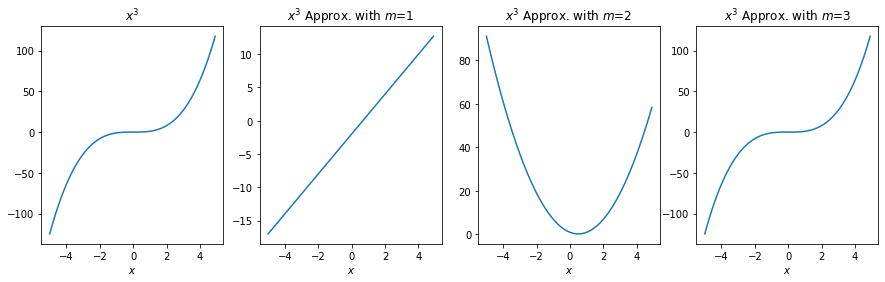

In [ ]:
# Now let us evaluate how close our approximation is for various values of m.
import numpy as np
import matplotlib.pyplot as plt

# Let us compare the approximations for a set of x values:
x_vector=np.arange(-5, 5, 0.1)

# Find the approximations for our x values:
y_m_1=[xcube_approx(x,1) for x in x_vector]
y_m_2=[xcube_approx(x,2) for x in x_vector]
y_m_3=[xcube_approx(x,3) for x in x_vector]

# We have our ground truth (correct) values:
y_correct = [x*x*x for x in x_vector]

# Let's plot the results and the correct function (x**3)
# We have a multi-plot plot, so we will use subplot() function
plt.rcParams['figure.figsize'] = 15, 4 # Sets the figure size

# First subplot: The correct (original) function that we are approximating
plt.subplot(1, 4, 1)
plt.plot(x_vector,y_correct, label='x**3')
plt.title('$x^3$')
plt.xlabel('$x$')

# Second subplot: Approximation with one term
plt.subplot(1, 4, 2)
plt.plot(x_vector,y_m_1) 
plt.title("$x^3$ Approx. with $m$=1")
plt.xlabel('$x$')

# Third subplot: Approximation with two terms
plt.subplot(1, 4, 3)
plt.plot(x_vector,y_m_2)
plt.title("$x^3$ Approx. with $m$=2")
plt.xlabel('$x$')

# Fourth subplot: Approximation with three terms
plt.subplot(1, 4, 4)
plt.plot(x_vector,y_m_3)
plt.title("$x^3$ Approx. with $m$=3")
plt.xlabel('$x$')

## 11.2. Finding the Roots of a Function

Let us assume that we have a non-linear, continuous function $f(x)$ that intersects the horizontal axis as in <font color=gray>Figure 11.2</font>. We are interested in finding $r_0, ..., r_n$ such that $f(r_i)=0$. We call these intersections ($r_0, r_1, r_2$ in <font color=gray>Figure 11.2</font>) the roots of function $f()$. 

For many problems in Engineering and Mathematics, finding the values of these intersections is very useful. For example, many problems requiring solutions to equations like $g(x)=h(x)$ can be reformulated as a root finding problem for $g(x)-h(x)=0$.

<center><img  src="https://github.com/sinankalkan/CENG240/blob/master/figures/chapter11_function_f.png?raw=true">

*Figure 11.2: Finding the roots of a function $f(x)$ means finding $r_0, .., r_n$ for which the function is zero, $f(r_i)=0$.*
</center>




### 11.2.1. Newton's Method for Finding the Roots

Newton's method is one of the many methods for finding the roots of a function. It is a very common method that randomly starts at an $x_0$ value and iteratively takes one step at a time towards a root. The method can be described with the following iterative steps:

**Step 1**: Set an iteration variable, $i$, to 0. Initialize $x_i$ randomly; however, if you have a good guess, it is always better to initialize $x_i$ with it. For our example function $f(x)$ in <font color=gray>Figure 11.2</font>, see the selected $x_i$ in <font color=gray>Figure 11.3</font>.

<center><img  src="https://github.com/sinankalkan/CENG240/blob/master/figures/chapter11_function_f_step1.png?raw=true">

*Figure 11.3: One initial step of Newton's method. The tangent line at $f(x_0)$ is used to calculate the next value of $x_i$, getting us closer to a root.*
</center>

**Step 2**: Find the intersection of the tangent line at $x_i$ with the horizontal axis. The tangent line to the function at $x_i$ is illustrated as the green dashed line in <font color=gray>Figure 11.3</font>. This line can be easily derived using $x_i$ and $f'(x_i)$.

Let us use $x_{i+1}$ to denote the intersection of the tangent line with the horizontal axis. Using the definition of the derivative and simple geometric rules, we can easily show that $x_{i+1}$ satisfies the following:

$$
 \frac{x_{i}-x_{i+1}}{f(x_i)} = \frac{1}{f'(x_i)},
$$

with which we can formulate how we can find $x_{i+1}$ as follows:

$$
x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}.
$$

**Step 3**: Repeat Step 2 by replacing $x_i \leftarrow x_{i+1}$ until "convergence".

The intuition behind the Newton's method is simple: For a linear function such as $y=ax+b$, the root is $r=-b/a$, which can be easily derived from the slope and a known $y$ value. For a non-linear function $y=f(x)$, we make an approximation by assuming $f()$ to be linear at point $x_0$ and use the slope of this linear approximation to find a new $x_0$ that is closer to the root.

### 11.2.2 Misc Details on Newton's Method for the Curious

It is not possible to cover all aspects of these elegant methods in detail. However, it would be a shame to skip the following details and hide them from a curious mind.

**The Taylor Series Perspective for Newton's Method**

Newton's method for finding a root of a function $f()$ works iteratively starting from an initial value $x_0$ by using the first-order expansion of $f()$ around $x_i$:

$$
f(x_{i+1}) \approx f(x_i) + \frac{f'(x_i)}{1!}(x_{i+1}-x_i),
$$

which can be simplified by rewriting $x_{i+1}=x_i+\delta$:

$$
f(x_{i}+\delta) \approx f(x_i) + \frac{f'(x_i)}{1!}\delta.
$$

We are interesting finding $\delta$ such that the approximation is equal to zero, in other words:

$$
0 = f(x_i) + \frac{f'(x_i)}{1!}\delta,
$$

which yields the delta value for which the approximation is zero:

$$
\delta = -\frac{f(x_i)}{f'(x_i)}.
$$

Plugging this into $x_{i+1}=x_i + \delta$, we obtain the equation for calculating the next value in the sequence towards a minimum of function $f()$:

$$
x_{i+1} \leftarrow x_i - \frac{f(x_i)}{f'(x_i)}.
$$

**Notes on Convergence**

A careful reader should have identified two important issues with Newton's method: 

1. How can we be sure that this method converges to a solution, i.e. a root?
 
  If function $f()$ satisfies certain conditions, then we can guarantee that Newton's method converges to a root. The details of these conditions and the proofs are beyond the scope of the book and the interested reader can check e.g. [Wikipedia](https://en.wikipedia.org/wiki/Newton%27s_method#Analysis).

  To be on the safe side, we can limit the maximum number of steps that can we take and use the calculated value at the end. 

2. If convergence can be guaranteed, how can we know that we have converged to a solution?

  A common technique in such iterative algorithms is to check whether the difference between the consecutive values is tiny. In our case, if $|x_{i+1}-x_i| < \epsilon$, where $\epsilon$ is a very small number, then we can assume that consecutive steps do not lead to much change in $x_i$ and therefore, we can stop our algorithm. Of course, the value of $\epsilon$ will be critical in determining how many iterations are needed to 'converge' to a result. 

**Notes on Multiple Roots**

Newton's method converges only to a single root based on the initial value $x_0$. In order to find other roots, the algorithm needs to be executed with a different value of $x_0$, which will hopefully lead to a different root than the ones that we have identified before. 

Since our knowledge about $f()$ or its roots is limited, running the algorithm for $N$ times for different values of $x_0$ is the only option. If, on the other hand, we knew roughly the ranges of $x$ where function $f()$ might have roots, then we could use this knowledge to choose better $x_0$ values.


### 11.2.3. Newton's Method in Python

Let us implement Newton's method in Python and try to find the roots of an example function.

In [ ]:
def find_root(f, f_deriv, x_0, max_steps=10, delta=0.001, verbose=True):
  """
    Use Newton's method to find a root of function f, given its derivative f_deriv.
    Inputs: f => function
            f_deriv => derivative of function f
            x_0 => initial x value
            max_steps => maximum number of iterative steps (default: 10)
            delta => if |x_i+1 - x_i| < delta, then assume convergence
  """
  x_old = x_0
  for i in range(max_steps):
    # Step 2
    try: 
      x_new = x_old - f(x_old) / f_deriv(x_old)
    except ZeroDivisionError:
      # Encountered division-by-zero, return None
      return None

    if verbose: print("Iteration ", i, ". (x_old, x_new): ", (x_old, x_new), " |x_new-x_old|: ", abs(x_new-x_old))
    if abs(x_new-x_old) < delta: break

    # Step 3
    x_old = x_new

  return x_new

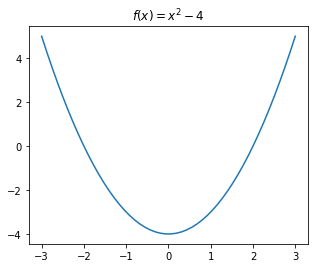

In [ ]:
# Let us pick a function and test our implementation

# Assume that our function is: f(x) = x^2 - 4
def f(x_i): return x_i**2-4

# This is the derivative, f'(x_i)
def f_deriv(x_i): return 2*x_i

# Let us draw our function first
import matplotlib.pyplot as plt
import numpy as np

def draw_f():
  # Uniformly sample 50 x values between -5 and 5:
  x = np.linspace(-3, 3, 50)

  plt.rcParams['figure.figsize'] = 5, 4

  plt.plot(x, f(x))
  plt.title('$f(x)=x^2 - 4$')

draw_f()

trial 0  ended with root:  2.0  value at root, f(r):  0.0
trial 1  ended with root:  2.000000000000002  value at root, f(r):  8.881784197001252e-15
trial 2  ended with root:  -2.000000000006711  value at root, f(r):  2.6844304557016585e-11
trial 3  ended with root:  -2.000000000006711  value at root, f(r):  2.6844304557016585e-11
trial 4  ended with root:  2.000000000000002  value at root, f(r):  8.881784197001252e-15
trial 5  ended with root:  -2.000000000026214  value at root, f(r):  1.0485656787295738e-10
trial 6  ended with root:  -2.000000000000002  value at root, f(r):  8.881784197001252e-15
trial 7  ended with root:  -2.000000000006711  value at root, f(r):  2.6844304557016585e-11
trial 8  ended with root:  -2.000000000000002  value at root, f(r):  8.881784197001252e-15
trial 9  ended with root:  2.000000000026214  value at root, f(r):  1.0485656787295738e-10


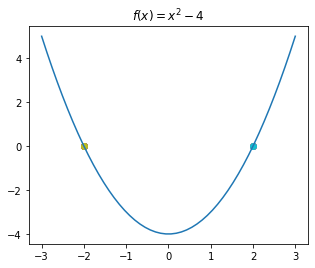

In [ ]:
# Let us test our solution with 10 random initial values
import random

draw_f()
for i in range(10):
  x_0 = random.randint(-5, 5) # A random integer in [-5, 5]
  r = find_root(f, f_deriv, x_0, max_steps=50, delta=0.0001, verbose=False)
  if (not r) or (abs(f(r)) > 0.001): continue # Diverged or divison-by-zero, ignore
  print("trial", i, " ended with root: ", r, " value at root, f(r): ", f(r))
  plt.scatter(r, f(r))


### 11.2.4 Newton's Method in SciPy

Let us see how we can use Newton's method from the SciPy library (from Chapter 10) to find the roots of a function. Note that we do not need to provide the derivative of the function to SciPy. It used numerical differentiation to calculate it for us.

trial 0  ended with root:  2.0  value at root, f(r):  0.0
trial 1  ended with root:  -1.9999999996184186  value at root, f(r):  -1.5263257324704682e-09
trial 2  ended with root:  -2.000000075022694  value at root, f(r):  3.000907806693931e-07
trial 4  ended with root:  1.9999999996184186  value at root, f(r):  -1.5263257324704682e-09
trial 5  ended with root:  -2.0000000003832255  value at root, f(r):  1.532901805489928e-09
trial 6  ended with root:  2.0000000003832255  value at root, f(r):  1.532901805489928e-09
trial 7  ended with root:  -2.0000000032851974  value at root, f(r):  1.3140789789645169e-08
trial 8  ended with root:  2.000000075022694  value at root, f(r):  3.000907806693931e-07
trial 9  ended with root:  -2.000000075022694  value at root, f(r):  3.000907806693931e-07


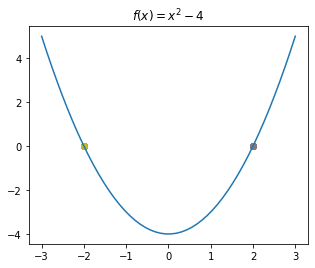

In [ ]:
from scipy.optimize import newton
import random

draw_f() # Defined above
for i in range(10):
  x_0 = random.randint(-5, 5) # A random integer in [-5, 5]
  r = newton(f, x_0, fprime=None, args=(), tol=0.0001, maxiter=50)
  if (not r) or (abs(f(r)) > 0.001): continue # Diverged or divison-by-zero, ignore
  print("trial", i, " ended with root: ", r, " value at root, f(r): ", f(r))
  plt.scatter(r, f(r))

## 11.3. Finding a Minimum of Functions

An important problem frequently encountered in many disciplines is optimisation. In such problems, as illustrated in <font color=gray>Figure 11.4</font>, we have a function $f(x)$ and we wish to find its minimum value ($f^*$):

$$
f^* \leftarrow \min_{x\in\mathbb{R}} f(x),
$$

or the value ($x^*$) that minimizes it:

$$
x^* \leftarrow \arg\min_{x\in\mathbb{R}} f(x).
$$

In many practical settings, the functions that we work with may have multiple minima. In such a case, the minimum point, $x^*$, can be either (i) a *global minimum* such that there may *not* be any other point $\hat{x}$ with $f(\hat{x}) < f(x^*)$, (ii) a *local minimum* such that $x^*$ is the minimum of a local  neighborhood.

The methods generally exploit two important cues: (i) At a minimum, the sign of the first-order derivative changes (on the sides of the minimum). (ii) At a minimum, the first derivative is zero.

<center><img  src="https://github.com/sinankalkan/CENG240/blob/master/figures/chapter11_function_f_minimum.png?raw=true">

*Figure 11.4: Finding a minimum of a function $f(x)$ means finding $x^*$ for which $f(x^*)$ is the lowest value (or lower than all others in a local neighborhood) that function $f()$ can take.*
</center>


### 11.3.1. Newton's Method for Finding the Minimum of a Function

Similar to find the the root of a function explained in Section 11.2, Newton's method for finding a local minimum of a function $f()$ works iteratively starting from an initial value $x_0$ by using the *second-order expansion* of $f()$ around $x_i$ this time:

$$
f(x_{i+1}) \approx f(x_i) + \frac{f'(x_i)}{1!}(x_{i+1}-x_i)+ \frac{f''(x_i)}{2!}(x_{i+1}-x_i)^2,
$$

which can be simplified by rewriting $x_{i+1}=x_i+\delta$:

$$
f(x_{i}+\delta) \approx f(x_i) + \frac{f'(x_i)}{1!}\delta+ \frac{f''(x_i)}{2!}\delta^2.
$$

We are interested in finding $\delta$ that minimizes the approximation. This can be obtained by setting the first derivative to zero:

$$
\frac{d}{d\delta} \left(f(x_i) + \frac{f'(x_i)}{1!}\delta+ \frac{f''(x_i)}{2!}\delta^2\right) = f'(x_i)+f''(x_i)\delta = 0,
$$

which yields the delta value minimizing the approximation:

$$
\delta = -\frac{f'(x_i)}{f''(x_i)}.
$$

Plugging this into $x_{i+1}=x_i + \delta$, we obtain the equation for calculating the next value in the sequence towards a minimum of function $f()$:

$$
x_{i+1} \leftarrow x_i - \frac{f'(x_i)}{f''(x_i)}.
$$

### 11.3.2 Misc Details for the Curious

**Notes on Convergence**

Newton's method can converge to a local minimum if (i) $f$ is a strongly convex function with Lipschitz Hessian and (ii) $x_0$ is close enough to $x^* \leftarrow \arg\min_{x\in\mathbb{R}} f(x)$. More formally when:
$$
\|x_{i+1}-x^*\| \leq {\frac {1}{2}}\|x_{i}-x_{*}\|^{2}. \qquad \forall i\geq 0.
$$

In plain English, (i) we have a "well-shaped" local neighborhood in which we can talk about the concept of a minimum, (ii) our initial value, $x_0$, is inside such a neighborhood.

**Notes on Multiple Minima**

Similar to the case for root finding, Newton's method converges only to a single minimum based on the initial value $x_0$. In order to find other minima, the algorithm needs to be executed with a different value of $x_0$, which will hopefully lead to a different minimum than the ones that we have identified before. 

### 11.3.3. Newton's Method in Python

Now let us implement Newton's method for finding a minimum of a function from scratch, in Python.

In [ ]:
def find_local_min(f_deriv, f_second_deriv, x_0, max_steps=10, delta=0.001, verbose=True):
  """
    Use Newton's method to find a local minimum of function f, given its derivative f_deriv.
    Inputs: f => function
            f_deriv => derivative of function f
            x_0 => initial x value
            max_steps => maximum number of iterative steps (default: 10)
            delta => if |x_i+1 - x_i| < delta, then assume convergence
  """
  x_old = x_0
  for i in range(max_steps):
    try: 
      x_new = x_old - f_deriv(x_old) / f_second_deriv(x_old)
    except ZeroDivisionError:
      # Encountered division-by-zero, return None
      return None

    if verbose: print("Iteration ", i, ". (x_old, x_new): ", (x_old, x_new), " |x_new-x_old|: ", abs(x_new-x_old))
    if abs(x_new-x_old) < delta: break

    # Step 4
    x_old = x_new

  return x_new

# Assume that our function is: f(x) = x^2 - 4
def f_deriv(x_i): return 2*x_i
def f_second_deriv(x_i): return 2

trial 0 led to x_min:  0.0 , f'(x_min):  0.0
trial 1 led to x_min:  0.0 , f'(x_min):  0.0
trial 2 led to x_min:  0.0 , f'(x_min):  0.0
trial 3 led to x_min:  0.0 , f'(x_min):  0.0
trial 4 led to x_min:  0.0 , f'(x_min):  0.0
trial 5 led to x_min:  0.0 , f'(x_min):  0.0
trial 6 led to x_min:  0.0 , f'(x_min):  0.0
trial 7 led to x_min:  0.0 , f'(x_min):  0.0
trial 8 led to x_min:  0.0 , f'(x_min):  0.0
trial 9 led to x_min:  0.0 , f'(x_min):  0.0


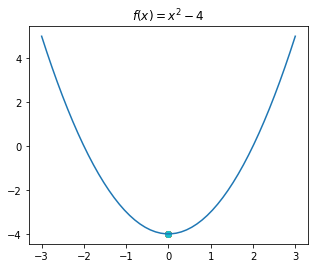

In [ ]:
# Let us test our solution with 10 random initial values
import random

draw_f() # defined in Section 11.2
for i in range(10):
  x_0 = random.randint(-5, 5) # A random integer in [-5, 5]
  x_min = find_local_min(f_deriv, f_second_deriv, x_0, max_steps=50, delta=0.0001, verbose=False)
  if (x_min == None) or (abs(f_deriv(x_min)) > 0.001): continue # Diverged or divison-by-zero, ignore
  print("trial", i, "led to x_min: ", x_min, ", f'(x_min): ", f_deriv(x_min))
  plt.scatter(x_min, f(x_min))

### 11.3.4 Newton's Method for Finding Minima in SciPy

Unfortunately, Newton's method as explained in Section 11.3.1 does not exist in SciPy. However, there are many alternatives and we will just illustrate only one of them here.

trial 0 led to x_min:  1.4872654968309704e-08 , f'(x_min):  2.974530993661941e-08
trial 1 led to x_min:  1.4872654968309704e-08 , f'(x_min):  2.974530993661941e-08
trial 2 led to x_min:  1.4872654968309704e-08 , f'(x_min):  2.974530993661941e-08
trial 3 led to x_min:  1.4872654968309704e-08 , f'(x_min):  2.974530993661941e-08
trial 4 led to x_min:  1.4872654968309704e-08 , f'(x_min):  2.974530993661941e-08
trial 5 led to x_min:  1.4872654968309704e-08 , f'(x_min):  2.974530993661941e-08
trial 6 led to x_min:  1.4872654968309704e-08 , f'(x_min):  2.974530993661941e-08
trial 7 led to x_min:  1.4872654968309704e-08 , f'(x_min):  2.974530993661941e-08
trial 8 led to x_min:  1.4872654968309704e-08 , f'(x_min):  2.974530993661941e-08
trial 9 led to x_min:  1.4872654968309704e-08 , f'(x_min):  2.974530993661941e-08


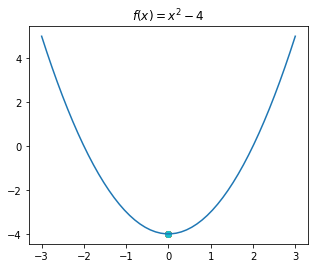

In [ ]:
from scipy.optimize import minimize_scalar
import random

draw_f()
for i in range(10):
  x_0 = random.randint(-5, 5) # A random integer in [-5, 5]
  result = minimize_scalar(f, method='golden', tol=0.001, options={'maxiter': 50})
  x_min = result['x']
  print("trial", i, "led to x_min: ", x_min, ", f'(x_min): ", f_deriv(x_min))
  plt.scatter(x_min, f(x_min))

## Important Concepts

We would like our readers to have grasped the following crucial concepts and keywords from this chapter:

* Taylor Series for function approximation.
* Newton's method for finding the roots and the minima of functions.
* Local minimum vs. global minimum. 

## Further Reading

* Taylor Series: https://openstax.org/books/calculus-volume-2/pages/6-3-taylor-and-maclaurin-series

* Newton's Method:

  * https://openstax.org/books/calculus-volume-1/pages/4-9-newtons-method
  * http://www.opentextbookstore.com/calc/2_7.pdf

## Exercises

* For the Taylor series approximation of $x^3$ in Section 11.1.1:

  1. Discuss how and why the approximation is changing when we add more terms. 

  2. Discuss why having 3 terms in the approximation yields a function that is very close to the original function.

  3. Write a Python code that checks whether an approximation is exactly the same as the function being approximated. Use this code to check whether using 3 terms in Taylor series expansion was sufficient for approximating $x^3$.

* Approximate the $\sin$ function using Taylor Series:

  1. Approximate the $\sin$ function with the Taylor Series expansion by taking $a=0$. You will need the $n$th derivative of $\sin$, which turns out to be simply $\frac{d^{n}}{d x^{n}} \sin(x) = \sin(x+n\pi/2)$.

  2. Plot the approximation for different number of terms ($m$): 1, 2, 3 and 4. Observe what happens when more terms are added to the approximation.

  3. Compare your approximation results to those we obtained for $x^3$. Discuss the reasons for similarities and differences.

* Find the roots of the following functions using Newton's Method:

  1. $f(x)=x^2-4$ for $x\in [-5, 5]$.

  2. $f(x)=sin(x)$ for $x\in [0, \pi]$.

  3. $f(x)=log(x)$ for $x\in [0.5, 2.5]$.

* Consider a second-order function, e.g. $f(x)=x^2-4$, which has a minimum at $x=0$. 

  1. Plot $f()$ and its derivative $f'()$ using matplotlib.

  2. Do you see a link between the root of $f'()$ and the minimum of $f()$?

  3. Using `scipy.optimize.newton()` function, which is for finding the roots of a function, find the *minimum* of function $f()$. Hint: A minimum is a root of the first order derivative.